In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
%run ..\Functions.ipynb

# Collocated dekadal data

In [2]:
obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
stations_csv = r"..\0_insitu\FLUXNET2022.csv"
df_stations = pd.read_csv(stations_csv, sep=';',index_col=0)
df_stations

,Site,Period,Dataset,x,y
0,AR-TF1,2016-2018,AMF,-66.733500,-54.973300
1,CA-Cbo,1994-2020,AMF,-79.933300,44.316700
2,CA-DB2,2019-2020,AMF,-122.995100,49.119000
3,CA-DBB,2014-2020,AMF,-122.984900,49.129300
4,CA-ER1,2015-2020,AMF,-80.412300,43.640500
...,...,...,...,...,...
267,SE-Deg,2001-2020,ICOS-WW,19.557448,64.182333
268,SE-Htm,2015-2020,ICOS-WW,13.417893,56.097566
269,SE-Nor,2014-2020,ICOS-WW,17.478520,60.086990
270,SE-Ros,2014-2020,ICOS-WW,19.738000,64.172500


Steps
- create a dataframe
- Read csv data 
- Filter empty rows 
- Calculate metrics for each stations
- 

# concatenate all sites

In [3]:
row = df_stations.iloc[0]
site = row['Site']
obs_folder = obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
obs_fh = os.path.abspath(os.path.join(obs_folder,site+".csv"))
df = pd.read_csv(obs_fh, parse_dates=True,index_col=0)

#remove masked error
start = "2018-01-01"
df = df.loc[start::]
df = df[df['mask']==0]
df.loc[:,'Site']=site
df = df.reset_index() 
df

,Date,AaIi,AaIii,AbIi,AbIii,AaIIi,AbIIi,WaPORv3L1,mask,PMLv2,MODIS,SSEBop,Site
0,2018-01-01,1.815152,1.797770,NaN,NaN,1.800842,NaN,1.6,0,1.981250,1.683906,2.6,AR-TF1
1,2018-01-11,1.578355,1.562931,NaN,NaN,1.060065,NaN,1.7,0,1.751500,1.633906,2.4,AR-TF1
2,2018-01-21,1.443526,1.427905,NaN,NaN,0.473640,NaN,1.8,0,1.748636,2.070312,1.7,AR-TF1
3,2018-02-01,1.792598,1.775629,NaN,NaN,1.762503,NaN,1.5,0,1.679750,1.860469,2.3,AR-TF1
4,2018-02-11,1.398662,1.384739,NaN,NaN,1.387317,NaN,1.5,0,1.575875,1.427969,2.1,AR-TF1
5,2018-02-21,1.722765,1.709135,NaN,NaN,1.712505,NaN,2.2,0,1.510312,1.526172,0.8,AR-TF1
6,2018-03-01,1.244057,1.229870,NaN,NaN,1.232782,NaN,1.7,0,1.343125,1.507031,1.5,AR-TF1
7,2018-03-11,0.602896,0.595220,NaN,NaN,0.596351,NaN,0.8,0,1.019000,0.977187,1.7,AR-TF1
8,2018-03-21,1.229332,1.215311,NaN,NaN,1.217095,NaN,1.2,0,0.920795,0.890909,1.6,AR-TF1
9,2018-04-01,0.348912,0.343611,NaN,NaN,0.344250,NaN,0.6,0,0.582875,0.668125,0.9,AR-TF1


In [4]:
for i,row in df_stations.iterrows():
    site = row['Site']
    obs_folder = obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
    try:
        obs_fh = os.path.abspath(os.path.join(obs_folder,site+".csv"))
        df = pd.read_csv(obs_fh, parse_dates=True,index_col=0)
        start = "2018-01-01"
        df = df.loc[start::]
        if 'mask' in df.columns:
            df = df[df['mask']==0]
        df.loc[:,'Site']=site
        df = df.reset_index() 
        
        if i== 0:
            df_all = df
        else:
            df_all = pd.concat([df_all, df], axis=0, ignore_index=True)
    except:
        print(f'Error: {obs_fh}')
    

Error: D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\FLUXNET\FLUXNET2022\US-Wi0.csv
Error: D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\FLUXNET\FLUXNET2022\AU-Adr.csv


In [5]:
df_all

,Date,AaIi,AaIii,AbIi,AbIii,AaIIi,AbIIi,WaPORv3L1,mask,PMLv2,MODIS,SSEBop,Site
0,2018-01-01,1.815152,1.797770,NaN,NaN,1.800842,NaN,1.6,0.0,1.981250,1.683906,2.6,AR-TF1
1,2018-01-11,1.578355,1.562931,NaN,NaN,1.060065,NaN,1.7,0.0,1.751500,1.633906,2.4,AR-TF1
2,2018-01-21,1.443526,1.427905,NaN,NaN,0.473640,NaN,1.8,0.0,1.748636,2.070312,1.7,AR-TF1
3,2018-02-01,1.792598,1.775629,NaN,NaN,1.762503,NaN,1.5,0.0,1.679750,1.860469,2.3,AR-TF1
4,2018-02-11,1.398662,1.384739,NaN,NaN,1.387317,NaN,1.5,0.0,1.575875,1.427969,2.1,AR-TF1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28990,2020-11-11,0.059801,0.058511,0.030909,0.030237,0.058503,0.010290,0.0,NaN,0.067500,0.089063,0.0,SE-Svb
28991,2020-11-21,0.011606,0.011352,0.008057,0.007880,0.011358,-0.000349,0.0,NaN,0.018500,0.050469,0.0,SE-Svb
28992,2020-12-01,0.004458,0.004366,0.002268,0.002221,0.004365,-0.000416,0.0,NaN,0.000250,0.071406,0.0,SE-Svb
28993,2020-12-11,0.004024,0.003919,0.001565,0.001527,0.003909,-0.000264,0.0,NaN,0.000000,0.080000,0.0,SE-Svb


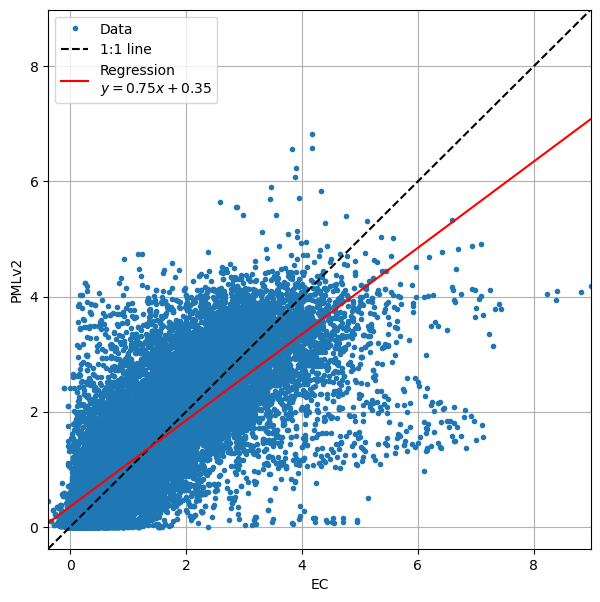

In [7]:
# your data
df_= df_all[['AaIi','PMLv2']]
df_ = df_.dropna()
x = df_['AaIi']
y = df_['PMLv2']

# prepare figure
fig, ax = plt.subplots(figsize=(7,7))

# scatter
ax.plot(x, y, '.', label='Data')

# 1:1 line
lims = [min(x.min(), y.min()), max(x.max(), y.max())]
ax.plot(lims, lims, 'k--', label='1:1 line')

# regression line
coef = np.polyfit(x, y, 1)
reg = np.poly1d(coef)
ax.plot(lims, reg(lims), 'r-', 
        label=f'Regression\n$y={coef[0]:.2f}x+{coef[1]:.2f}$')

# equal axis limits
ax.set_xlim(lims)
ax.set_ylim(lims)

# labels, grid, legend
ax.set_xlabel('EC')
ax.set_ylabel('PMLv2')
ax.grid(True)
ax.legend()

plt.show()

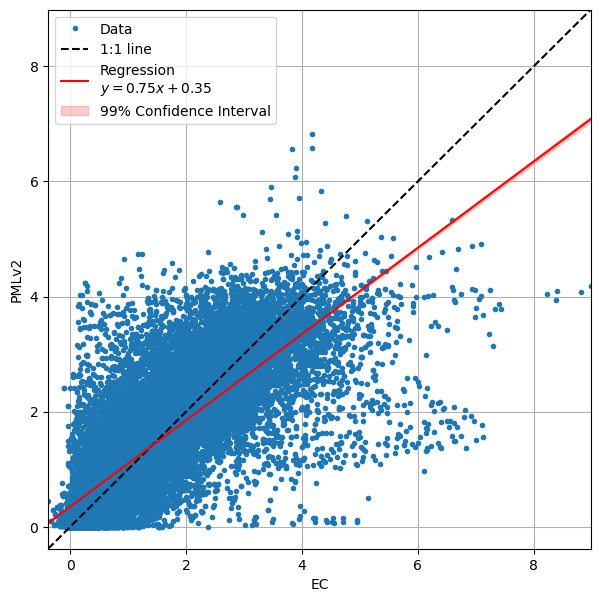

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# your data
df_= df_all[['AaIi','PMLv2']]
df_ = df_.dropna()
x = df_['AaIi'].values
y = df_['PMLv2'].values

# prepare figure
fig, ax = plt.subplots(figsize=(7, 7))

# scatter
ax.plot(x, y, '.', label='Data')

# 1:1 line
lims = [min(x.min(), y.min()), max(x.max(), y.max())]
ax.plot(lims, lims, 'k--', label='1:1 line')

# regression
coef = np.polyfit(x, y, 1)
reg = np.poly1d(coef)
y_pred = reg(x)

# calculate confidence interval
n = len(x)
mean_x = np.mean(x)
t_val = stats.t.ppf(0.95, df=n-2)
s_err = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
conf = t_val * s_err * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))

# sort for plotting
sorted_idx = np.argsort(x)
x_sorted = x[sorted_idx]
y_sorted = y_pred[sorted_idx]
conf_sorted = conf[sorted_idx]

# regression line
ax.plot(lims, reg(lims), 'r-', label=f'Regression\n$y={coef[0]:.2f}x+{coef[1]:.2f}$')

# confidence interval
ax.fill_between(x_sorted, y_sorted - conf_sorted, y_sorted + conf_sorted, 
                color='r', alpha=0.2, label='99% Confidence Interval')

# equal axis limits
ax.set_xlim(lims)
ax.set_ylim(lims)

# labels, grid, legend
ax.set_xlabel('EC')
ax.set_ylabel('PMLv2')
ax.grid(True)
ax.legend()

plt.show()


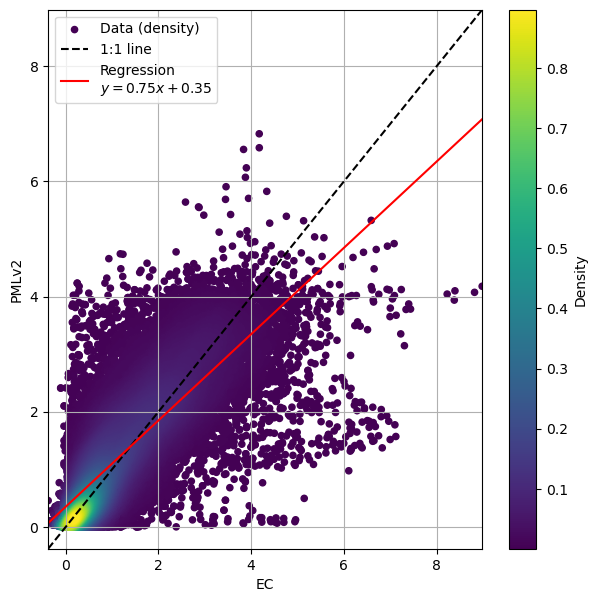

In [9]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# your data
df_= df_all[['AaIi','PMLv2']]
df_ = df_.dropna()
x = df_['AaIi'].values
y = df_['PMLv2'].values

# calculate point density
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)  # density values for each point

# sort the points by density, so that high density points are plotted on top
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# prepare figure
fig, ax = plt.subplots(figsize=(7, 7))

# density scatter plot
scatter = ax.scatter(x, y, c=z, s=20, cmap='viridis', label='Data (density)')

# colorbar for density
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Density')

# 1:1 line
lims = [min(x.min(), y.min()), max(x.max(), y.max())]
ax.plot(lims, lims, 'k--', label='1:1 line')

# regression
coef = np.polyfit(x, y, 1)
reg = np.poly1d(coef)
y_pred = reg(x)

# calculate confidence interval
n = len(x)
mean_x = np.mean(x)
t_val = stats.t.ppf(0.95, df=n-2)
s_err = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
conf = t_val * s_err * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))

# sort for plotting regression and CI
sorted_idx = np.argsort(x)
x_sorted = x[sorted_idx]
y_sorted = y_pred[sorted_idx]
conf_sorted = conf[sorted_idx]

# regression line
ax.plot(lims, reg(lims), 'r-', label=f'Regression\n$y={coef[0]:.2f}x+{coef[1]:.2f}$')

# confidence interval
# ax.fill_between(x_sorted, y_sorted - conf_sorted, y_sorted + conf_sorted, 
#                 color='r', alpha=0.2, label='99% Confidence Interval')

# equal axis limits
ax.set_xlim(lims)
ax.set_ylim(lims)

# labels, grid, legend
ax.set_xlabel('EC')
ax.set_ylabel('PMLv2')
ax.grid(True)
ax.legend()

plt.show()


In [14]:
observation = 'AaIi'
product= 'PMLv2'
metrics=calc_metrics(df_[product], df_[observation])
metrics

{'r2': np.float64(0.6264020175287682),
 'nse': np.float64(0.5558017897519322),
 'bias': np.float64(0.02516652364184646),
 'rmse': np.float64(0.7489521959928098)}

In [15]:
np.sqrt(metrics['r2'])

np.float64(0.7914556320658589)

In [16]:
metrics['bias']*100/np.mean(df_['AaIi'])

np.float64(1.941515203945705)

# calculate metrics per sites

In [17]:
data = {
'Site': [],
'N': [],
'EC average': [],
'EC std': [],
'PMLv2 average': [],
'PMLv2 std': [], 
'r2': [],
'nse': [],
'bias': [],
'rmse': [],
}
observation = 'AaIi'
product= 'PMLv2'
for site in df_all['Site'].unique():
    # print(site)
    df = df_all.loc[df_all['Site'] == site]
    data['Site'].append(site)
    data['N'].append(len(df))
    data['EC average'].append(df[observation].mean())
    data['EC std'].append(df[observation].std())
    data['PMLv2 average'].append(df[product].mean())
    data['PMLv2 std'].append(df[product].std())
    metrics=calc_metrics(df[product], df[observation])
    for metric in list(metrics.keys()):
        data[f'{metric}'].append(metrics[metric]) 

C:\Users\ntr002\AppData\Local\Temp\ipykernel_35580\437921566.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - numerator / denominator


In [18]:
df_all['Site'].unique()

array(['AR-TF1', 'CA-Cbo', 'CA-DB2', 'CA-DBB', 'CA-ER1', 'CA-LP1',
       'PE-QFR', 'US-ALQ', 'US-ARM', 'US-Bar', 'US-Bi1', 'US-Bi2',
       'US-BRG', 'US-BZB', 'US-BZF', 'US-BZo', 'US-BZS', 'US-CF1',
       'US-CF2', 'US-CF3', 'US-CF4', 'US-CS1', 'US-CS2', 'US-CS3',
       'US-CS4', 'US-DFC', 'US-DS3', 'US-EDN', 'US-EML', 'US-GLE',
       'US-Ha1', 'US-HB1', 'US-HB2', 'US-HB3', 'US-Hn2', 'US-Hn3',
       'US-Ho2', 'US-HWB', 'US-ICh', 'US-ICs', 'US-ICt', 'US-Jo1',
       'US-Jo2', 'US-KFS', 'US-KLS', 'US-Kon', 'US-KS3', 'US-Me2',
       'US-Me6', 'US-MMS', 'US-Mo1', 'US-Mo2', 'US-Mo3', 'US-MOz',
       'US-Mpj', 'US-Myb', 'US-NC3', 'US-NC4', 'US-Ne1', 'US-NGB',
       'US-NGC', 'US-ONA', 'US-Pnp', 'US-RGA', 'US-RGB', 'US-RGo',
       'US-Rls', 'US-Rms', 'US-Ro4', 'US-Ro5', 'US-Ro6', 'US-Rpf',
       'US-Rwf', 'US-Rws', 'US-Seg', 'US-Ses', 'US-Sne', 'US-Snf',
       'US-SRG', 'US-SRS', 'US-Syv', 'US-Ton', 'US-Tw1', 'US-Tw3',
       'US-Tw4', 'US-Tw5', 'US-UMB', 'US-UMd', 'US-Var', 'US-V

In [19]:
len(df_all['Site'].unique())

222

In [20]:
df_data=pd.DataFrame(data)
df_data

,Site,N,EC average,EC std,PMLv2 average,PMLv2 std,r2,nse,bias,rmse
0,AR-TF1,12,1.155082,0.586027,1.239135,0.566589,0.871200,0.837006,0.084053,0.219008
1,CA-Cbo,108,1.555491,1.458481,1.332558,1.018757,0.735880,0.358307,-0.222934,0.812296
2,CA-DB2,39,0.760651,0.637470,1.162468,0.787601,0.909220,0.621309,0.401817,0.478419
3,CA-DBB,108,0.877452,0.755752,1.215120,0.856071,0.859115,0.700136,0.337668,0.466608
4,CA-ER1,108,1.597181,1.318358,1.367345,1.277088,0.786117,0.732202,-0.229836,0.657816
...,...,...,...,...,...,...,...,...,...,...
217,IL-Yat,108,0.802453,0.464470,1.120669,0.569955,0.381121,0.027454,0.318216,0.559469
218,IT-BFt,72,1.604714,1.029045,1.617239,1.374084,0.902196,0.861733,0.012525,0.507382
219,IT-Lav,108,1.731369,1.010285,1.469137,1.055562,0.840159,0.776225,-0.262233,0.497016
220,IT-MBo,108,1.638357,1.406579,1.386203,1.330409,0.860055,0.806933,-0.252154,0.581861


In [21]:
# calculate PBIAS
df_data['pbias']=df_data['bias']*100/df_data['EC average']

In [22]:
df_data.to_csv('222sites_metrics_PML.csv')

# Plot by land cover and climate

In [23]:
stations_xlsx = r"..\0_insitu\FLUXNET2022.xlsx"
df_meta = pd.read_excel(stations_xlsx, index_col=0)
df_meta

,Site,Period,Dataset,x,y,IGBP_site,Climate_site,Climate_KG0p01,P_yearavg_site,ET0_yearavg_site,P_yearavg_AgERA5,ET0_yearavg_AgERA5
0,AR-TF1,2016-2018,AMF,-66.733500,-54.973300,WET,0,ET,NaN,NaN,NaN,NaN
1,CA-Cbo,1994-2020,AMF,-79.933300,44.316700,DBF,Dfb,Dfb,NaN,NaN,NaN,NaN
2,CA-DB2,2019-2020,AMF,-122.995100,49.119000,WET,0,Csb,NaN,NaN,NaN,NaN
3,CA-DBB,2014-2020,AMF,-122.984900,49.129300,WET,Csb,Csb,NaN,NaN,NaN,NaN
4,CA-ER1,2015-2020,AMF,-80.412300,43.640500,CRO,Dfb,Dfb,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
220,SE-Deg,2001-2020,ICOS-WW,19.557448,64.182333,GRA,NaN,Dfb,NaN,NaN,NaN,NaN
221,SE-Htm,2015-2020,ICOS-WW,13.417893,56.097566,ENF,Dfb,Dfc,NaN,NaN,NaN,NaN
222,SE-Nor,2014-2020,ICOS-WW,17.478520,60.086990,ENF,Dfb,Dfb,NaN,NaN,NaN,NaN
223,SE-Ros,2014-2020,ICOS-WW,19.738000,64.172500,ENF,NaN,Dfb,NaN,NaN,NaN,NaN


In [24]:
site_to_igbp = df_meta.groupby('Site')['IGBP_site'].first()

# now you can safely map
df_data['IGBP'] = (
    df_data['Site']
      .map(site_to_igbp)
      .fillna('')
)
df_data

,Site,N,EC average,EC std,PMLv2 average,PMLv2 std,r2,nse,bias,rmse,pbias,IGBP
0,AR-TF1,12,1.155082,0.586027,1.239135,0.566589,0.871200,0.837006,0.084053,0.219008,7.276839,WET
1,CA-Cbo,108,1.555491,1.458481,1.332558,1.018757,0.735880,0.358307,-0.222934,0.812296,-14.332033,DBF
2,CA-DB2,39,0.760651,0.637470,1.162468,0.787601,0.909220,0.621309,0.401817,0.478419,52.825494,WET
3,CA-DBB,108,0.877452,0.755752,1.215120,0.856071,0.859115,0.700136,0.337668,0.466608,38.482836,WET
4,CA-ER1,108,1.597181,1.318358,1.367345,1.277088,0.786117,0.732202,-0.229836,0.657816,-14.390077,CRO
...,...,...,...,...,...,...,...,...,...,...,...,...
217,IL-Yat,108,0.802453,0.464470,1.120669,0.569955,0.381121,0.027454,0.318216,0.559469,39.655428,ENF
218,IT-BFt,72,1.604714,1.029045,1.617239,1.374084,0.902196,0.861733,0.012525,0.507382,0.780518,DBF
219,IT-Lav,108,1.731369,1.010285,1.469137,1.055562,0.840159,0.776225,-0.262233,0.497016,-15.145978,ENF
220,IT-MBo,108,1.638357,1.406579,1.386203,1.330409,0.860055,0.806933,-0.252154,0.581861,-15.390670,GRA


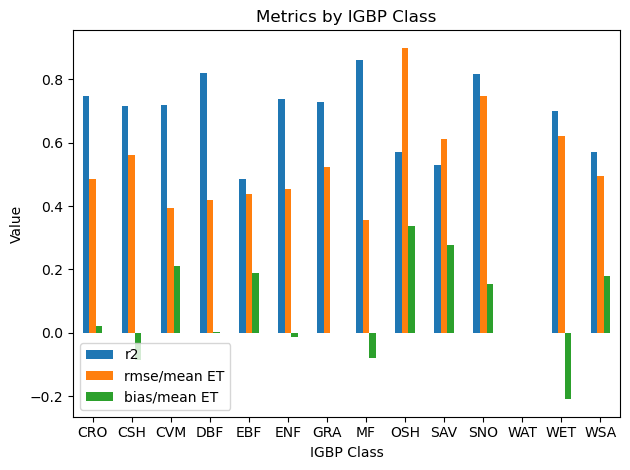

In [25]:
grouped = df_data.groupby('IGBP')[['r2', 'rmse', 'bias','EC average']].mean().reset_index().iloc[1:]
grouped['r'] = np.sqrt(grouped['r2'])
grouped['rmse/mean ET'] = grouped['rmse']/grouped['EC average'] 
grouped['bias/mean ET'] = grouped['bias']/grouped['EC average'] 
# Prepare for plotting: set IGBP as index and select only desired columns
plot_df = grouped.set_index('IGBP')[['r2','rmse/mean ET', 'bias/mean ET']]

# Plot bar chart
ax = plot_df.plot.bar(rot=0)
ax.set_xlabel('IGBP Class')
ax.set_ylabel('Value')
ax.set_title('Metrics by IGBP Class')
plt.tight_layout()
plt.show()

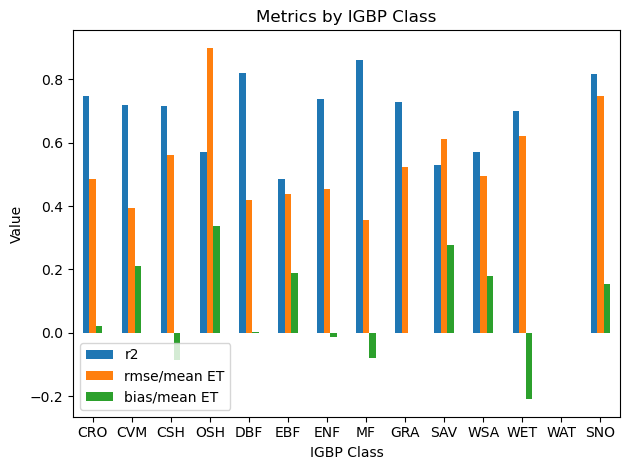

In [26]:
grouped=grouped.set_index('IGBP')
lst = ["CRO", "CVM", "CSH", "OSH", "DBF", "EBF", "ENF", "MF", "GRA", "SAV", "WSA", "WET", "WAT", "SNO"] #ordered
grouped = grouped.loc[lst]
# Prepare for plotting: set IGBP as index and select only desired columns
plot_df = grouped[['r2','rmse/mean ET', 'bias/mean ET']]

# Plot bar chart
ax = plot_df.plot.bar(rot=0)
ax.set_xlabel('IGBP Class')
ax.set_ylabel('Value')
ax.set_title('Metrics by IGBP Class')
plt.tight_layout()
plt.show()

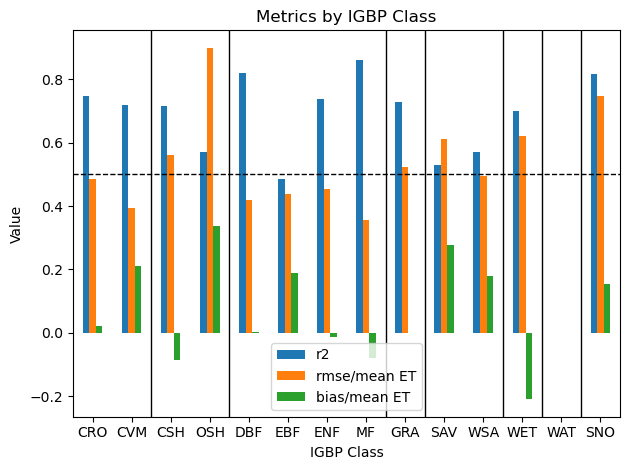

In [27]:
ax = plot_df.plot.bar(rot=0)
ax.set_xlabel('IGBP Class')
ax.set_ylabel('Value')
ax.set_title('Metrics by IGBP Class')
# add area
ax.axvline(x=1.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=3.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=7.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=8.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=10.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=11.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=12.5, color='black', linestyle='-', linewidth=1)
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
# annotation
ax.annotate('Cropland', (0,1),rotation=90)
ax.annotate('Shrubland',(2,1),rotation=90)
ax.annotate('Forest',(4,1),rotation=90)
ax.annotate('Grassland',(8,1),rotation=90)
ax.annotate('Savannah',(9,1),rotation=90)
ax.annotate('Wetland',(11,1),rotation=90)
ax.annotate('Water',(12,1),rotation=90)
ax.annotate('Snow',(13,1),rotation=90)

plt.tight_layout()
plt.show()

In [28]:
site_to_igbp = df_meta.groupby('Site')['Climate_KG0p01'].first()

# now you can safely map
df_data['Climate'] = (
    df_data['Site']
      .map(site_to_igbp)
      .fillna('')
)
df_data

,Site,N,EC average,EC std,PMLv2 average,PMLv2 std,r2,nse,bias,rmse,pbias,IGBP,Climate
0,AR-TF1,12,1.155082,0.586027,1.239135,0.566589,0.871200,0.837006,0.084053,0.219008,7.276839,WET,ET
1,CA-Cbo,108,1.555491,1.458481,1.332558,1.018757,0.735880,0.358307,-0.222934,0.812296,-14.332033,DBF,Dfb
2,CA-DB2,39,0.760651,0.637470,1.162468,0.787601,0.909220,0.621309,0.401817,0.478419,52.825494,WET,Csb
3,CA-DBB,108,0.877452,0.755752,1.215120,0.856071,0.859115,0.700136,0.337668,0.466608,38.482836,WET,Csb
4,CA-ER1,108,1.597181,1.318358,1.367345,1.277088,0.786117,0.732202,-0.229836,0.657816,-14.390077,CRO,Dfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,IL-Yat,108,0.802453,0.464470,1.120669,0.569955,0.381121,0.027454,0.318216,0.559469,39.655428,ENF,Cfb
218,IT-BFt,72,1.604714,1.029045,1.617239,1.374084,0.902196,0.861733,0.012525,0.507382,0.780518,DBF,Csa
219,IT-Lav,108,1.731369,1.010285,1.469137,1.055562,0.840159,0.776225,-0.262233,0.497016,-15.145978,ENF,Csa
220,IT-MBo,108,1.638357,1.406579,1.386203,1.330409,0.860055,0.806933,-0.252154,0.581861,-15.390670,GRA,Cfa


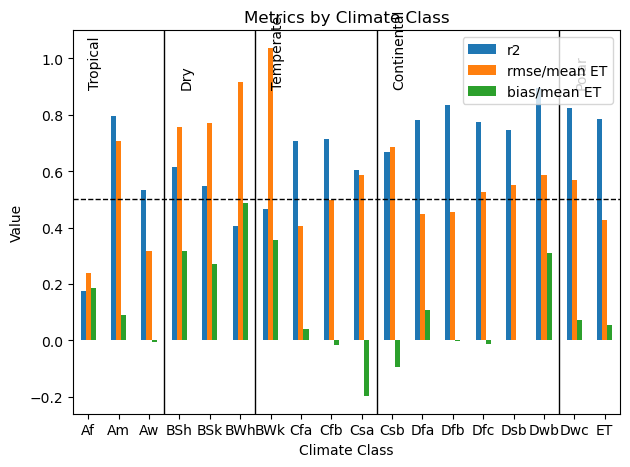

In [29]:
grouped = df_data.groupby('Climate')[['r2', 'rmse', 'bias','EC average']].mean().reset_index().iloc[1:]
grouped['r'] = np.sqrt(grouped['r2'])
grouped['rmse/mean ET'] = grouped['rmse']/grouped['EC average'] 
grouped['bias/mean ET'] = grouped['bias']/grouped['EC average'] 
# Prepare for plotting: set IGBP as index and select only desired columns
plot_df = grouped.set_index('Climate')[['r2','rmse/mean ET', 'bias/mean ET']]

# Plot bar chart
ax = plot_df.plot.bar(rot=0)
ax.set_xlabel('Climate Class')
ax.set_ylabel('Value')
ax.set_title('Metrics by Climate Class')

# add area
ax.axvline(x=2.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=5.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=9.5, color='black', linestyle='-', linewidth=1)
ax.axvline(x=15.5, color='black', linestyle='-', linewidth=1)
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
# annotation
ax.annotate('Tropical', (0,0.9),rotation=90)
ax.annotate('Dry',(3,0.9),rotation=90)
ax.annotate('Temperate',(6,0.9),rotation=90)
ax.annotate('Continental',(10,0.9),rotation=90)
ax.annotate('Polar',(16,0.9),rotation=90)

plt.tight_layout()
plt.show()

# Taylor diagram

In [30]:
#Source: https://colab.research.google.com/drive/19WJ8L2NlWA7xrDhieHE1Zvi90hyZAjcR
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):    
    def __init__(self, STD ,fig=None, rect=111, label='_',f_std=1.5):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs) # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs) # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        # Standard deviation axis extent
        self.smin = 0
        self.smax = f_std * self.STD
        gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        # Angle axis
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')
        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Normalized standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Normalized standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        # Useless
        ax.axis['bottom'].set_visible(False)
        # Contours along standard deviations
        ax.grid()
        self._ax = ax # Graphical axes
        self.ax = ax.get_aux_axes(tr) # Polar coordinates
        # Add reference point and STD contour
        l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=8, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_')
        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]
    def add_sample(self,STD,r,*args,**kwargs):
        l,= self.ax.plot(np.arccos(r), STD,*args, **kwargs) # (theta, radius)
        self.samplePoints.append(l)
        return l
    def add_contours(self,levels=5,text_label='$RMSE_c$',**kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        # !! CALCULATE centered RMSE
        RMSEc=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSEc, levels, **kwargs)
        
        return contours
# choose your color once
point_color = 'C0'    # the default “cycle” blue
transparency = 0.4    # 0.0 fully transparent → 1.0 fully opaque
def srl(obsSTD, s, r, l, ftitle='Taylor diagram', fsize=(10,10),fname=None):
    fig=plt.figure(figsize=fsize)
    std_extend = np.max(s)/obsSTD + 0.5
    dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='Observed',f_std=std_extend)
    plt.clabel(dia.add_contours(colors='0.5'), inline=1, fontsize=10)
    cs = plt.matplotlib.cm.Set1(np.linspace(0, 1, len(l))) #random color
    srlc = zip(s, r, l, cs)
    for i in srlc: # add point
        dia.add_sample(i[0], i[1], label=i[2], 
                       # c=i[3], #color
                       marker='o',
                   c=point_color,
                   alpha=transparency)
    spl = [p.get_label() for p in dia.samplePoints]
    # fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), 
    #            loc=[0.8,0.8])
    plt.title(ftitle)
    if fname != None:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    plt.close(fig)

C:\Users\ntr002\AppData\Local\Temp\ipykernel_35580\2256873636.py:13: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
C:\Users\ntr002\AppData\Local\Temp\ipykernel_35580\2256873636.py:76: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors='0.5'), inline=1, fontsize=10)


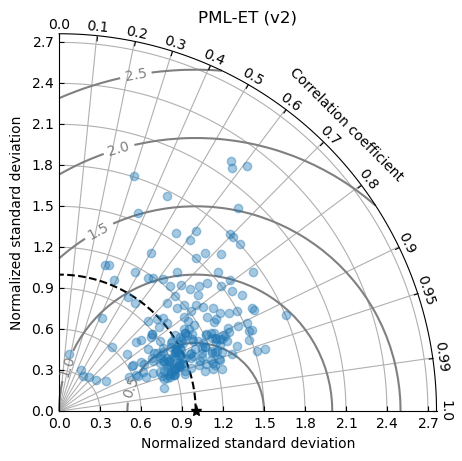

<Figure size 640x480 with 0 Axes>

In [32]:
df_plot = df_data.copy()
df_plot = df_plot.dropna()
obsSTD = 1
l = list(df_plot['Site'])
# Standard deviation of each predicted data
s = list(df_plot['PMLv2 std']/df_plot['EC std'])
# The correlation coefficient of each predicted data
r = list(np.sqrt(df_plot['r2']))
# Output file name
fname = 'TaylorDiagram.jpg'

# Note:s, r, and l has the same length
srl(obsSTD, s, r, l,
    ftitle='PML-ET (v2)',
    fsize=(5,5))

# histogram

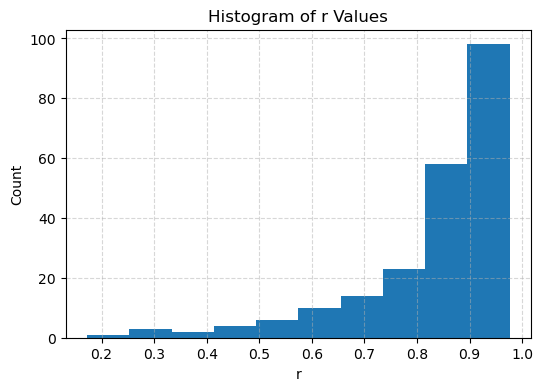

In [33]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(np.sqrt(df_data['r2']), bins=10)       # choose bins as needed
plt.xlabel('r')
plt.ylabel('Count')
plt.title('Histogram of r Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

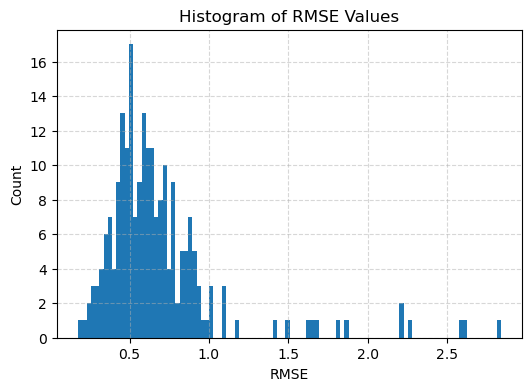

In [34]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['rmse'], bins=100)       # choose bins as needed
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('Histogram of RMSE Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

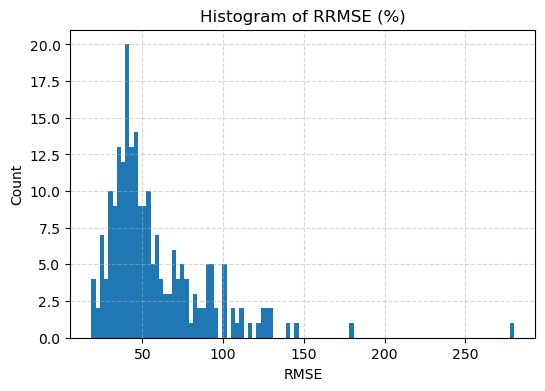

In [35]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['rmse']*100/df_data['EC average'], bins=100)       # choose bins as needed
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.title('Histogram of RRMSE (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

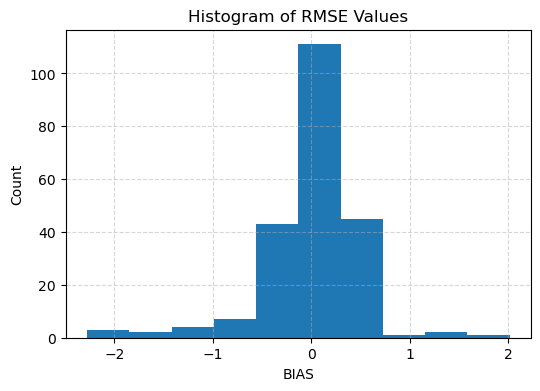

In [36]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['bias'], bins=10)       # choose bins as needed
plt.xlabel('BIAS')
plt.ylabel('Count')
plt.title('Histogram of RMSE Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

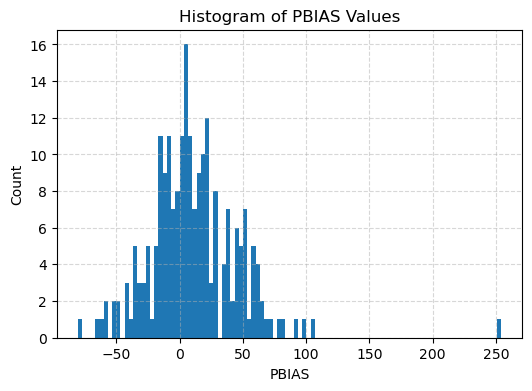

In [37]:
# assume your DataFrame is named df
plt.figure(figsize=(6,4))
plt.hist(df_data['bias']*100/df_data['EC average'], bins=100)       # choose bins as needed
plt.xlabel('PBIAS')
plt.ylabel('Count')
plt.title('Histogram of PBIAS Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# KDE

The vertical axis on a KDE plot is a probability density, not a probability. Densities can exceed 1 so long as the area under the curve integrates to 1.

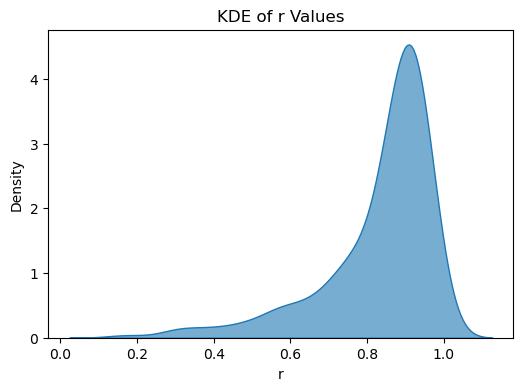

In [38]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.kdeplot(np.sqrt(df_data['r2']), bw_adjust=1, fill=True, alpha=0.6)
plt.xlabel('r')
plt.title('KDE of r Values')
plt.show()

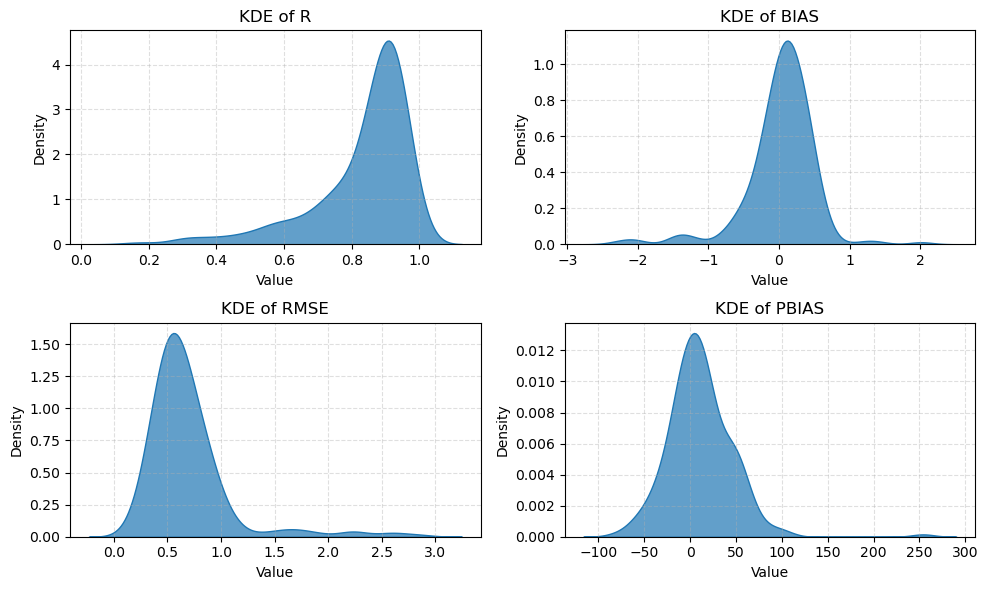

In [39]:
df_data['pbias']=df_data['bias']*100/df_data['EC average']
df_data['r']=np.sqrt(df_data['r2'])
metrics = ['r', 'bias', 'rmse', 'pbias']
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()  # flatten to 1D array

for ax, metric in zip(axes, metrics):
    sns.kdeplot(
        data=df_data[metric],
        bw_adjust=1,
        fill=True,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f'KDE of {metric.upper()}')
    ax.set_xlabel('Value')
    ax.grid(linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

<>:23: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\ntr002\AppData\Local\Temp\ipykernel_35580\1552976575.py:23: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if metric is 'r':


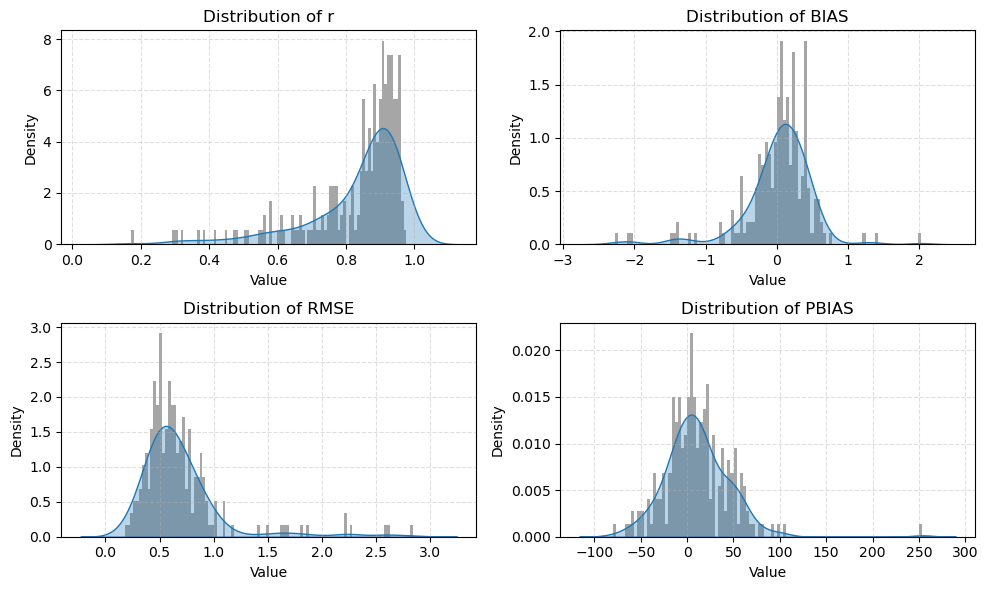

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df_data['pbias'] = df_data['bias'] * 100 / df_data['EC average']
df_data['r'] = np.sqrt(df_data['r2'])
metrics = ['r', 'bias', 'rmse', 'pbias']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()  # flatten to 1D array

for ax, metric in zip(axes, metrics):
    # plot histogram with 100 bins and light alpha
    ax.hist(df_data[metric], bins=100, color='gray', alpha=0.7, density=True)
    
    # plot KDE on top
    sns.kdeplot(
        data=df_data[metric],
        bw_adjust=1,
        fill=True,
        alpha=0.3,
        ax=ax
    )
    if metric is 'r':
        ax.set_title(f'Distribution of {metric}')
    else:
        ax.set_title(f'Distribution of {metric.upper()}')
    ax.set_xlabel('Value')
    ax.grid(linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [41]:
df_data[df_data['r'].isna()] #number of sites without results

,Site,N,EC average,EC std,PMLv2 average,PMLv2 std,r2,nse,bias,rmse,pbias,IGBP,Climate,r
31,US-HB1,36,2.375496,1.285454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WET,Cfa,NaN
62,US-Pnp,144,3.229158,2.116208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAT,Dfa,NaN
77,US-Snf,74,2.109595,1.206881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRA,Csa,NaN
